<a href="https://colab.research.google.com/github/wilsonfranco21/Frailej-n-Proyecto/blob/main/Entrenamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install livelossplot efficientnet tensorflow

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.optimizers import RMSprop
from keras.layers import Activation,Dropout,Flatten,Dense,GlobalMaxPooling2D,Conv2D, MaxPooling2D
from keras.callbacks import CSVLogger
from livelossplot.keras import PlotLossesCallback
import efficientnet.keras as efn



In [ ]:
TRAINING_LOGS_FILE = "training_logs.csv"
MODEL_SUMMARY_FILE = "model_summary.txt"
MODEL_FILE = "my_model.h5"
# revisar y documentar la estructura del modelo(arquitectura del modelo,tipo de capas,número de parámetros)
# formato HDF5, que es un formato comúnmente usado para almacenar modelos en Keras.

In [ ]:
# Hyperparams
IMAGE_SIZE = 150
IMAGE_WIDTH, IMAGE_HEIGHT = IMAGE_SIZE, IMAGE_SIZE
EPOCHS = 10
BATCH_SIZE = 32 # numero de imagens para cada epoca
TEST_SIZE = 30 # para el testeo

input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, 3)

In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Definir la arquitectura del modelo
# paddin same = las dimensiones de salida sean las mismas que las de entrada

model = Sequential() # secuencia de capas  se añadirán una tras otra
model.add(Conv2D(32, (3, 3), padding='same', input_shape=input_shape, activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

# Compilar el modelo con el optimizador Adam y una tasa de aprendizaje más baja
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.0001),  # Tasa de aprendizaje más baja
    metrics=['accuracy']
)


with open(MODEL_SUMMARY_FILE,"w") as fh:
    model.summary(print_fn=lambda line: fh.write(line + "\n"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Data augmentation
training_data_generator = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True)
validation_data_generator = ImageDataGenerator(
    rescale=1./255)
test_data_generator = ImageDataGenerator(
    rescale=1./255)

In [ ]:
 import os
import shutil
import random
from PIL import Image, ImageEnhance

def mover_imagenes_validas(source_directory, destination_directory):
    # Eliminar el directorio de destino si ya existe
    if os.path.exists(destination_directory):
        shutil.rmtree(destination_directory)

    # Crear el directorio de destino
    os.makedirs(destination_directory)

    # Iterar sobre los archivos en el directorio de origen
    for filename in os.listdir(source_directory):
        # Comprobar si el archivo es una imagen
        if filename.endswith((".jpg", ".png", ".jpeg", ".webp", ".jfif")):
            # Intentar abrir la imagen
            try:
                with Image.open(os.path.join(source_directory, filename)) as img:
                    # Si la apertura es exitosa, mover la imagen al directorio de destino
                    img.save(os.path.join(destination_directory, filename))
            except Exception as e:
                print(f"Error al abrir {filename}: {e}")
                # Si hay un error al abrir la imagen, pasar a la siguiente
                continue

def convertir_a_bn(directorio_origen, directorio_destino):
    # Eliminar el directorio de destino si ya existe
    if os.path.exists(directorio_destino):
        shutil.rmtree(directorio_destino)

    # Crear el directorio de destino
    os.makedirs(directorio_destino)

    # Obtener la lista de archivos en el directorio de origen
    archivos = os.listdir(directorio_origen)

    # Iterar sobre cada archivo en el directorio de origen
    for archivo in archivos:
        # Comprobar si el archivo es una imagen
        if archivo.endswith((".jpg", ".png", ".jpeg", ".webp", ".jfif")):
            # Abrir la imagen
            imagen = Image.open(os.path.join(directorio_origen, archivo))

            # Convertir la imagen a blanco y negro
            imagen_bn = imagen.convert("L")

            # Guardar la imagen en el directorio de destino
            nombre_archivo = os.path.splitext(archivo)[0] + "_bn.jpg"  # Cambiar extensión a jpg
            ruta_destino = os.path.join(directorio_destino, nombre_archivo)
            imagen_bn.save(ruta_destino)

            #print(f"Imagen convertida y guardada en: {ruta_destino}")

def aumentar_imagenes(directorio_origen, directorio_destino, cantidad):
    # Eliminar el directorio de destino si ya existe
    if os.path.exists(directorio_destino):
        shutil.rmtree(directorio_destino)

    # Crear el directorio de destino
    os.makedirs(directorio_destino)

    # Obtener la lista de archivos en el directorio de origen
    archivos = os.listdir(directorio_origen)

    # Iterar sobre cada archivo en el directorio de origen
    for archivo in archivos:
        # Comprobar si el archivo es una imagen
        if archivo.endswith((".jpg", ".png", ".jpeg", ".webp", ".jfif")):
            # Abrir la imagen
            imagen = Image.open(os.path.join(directorio_origen, archivo))

            # Realizar aumentos en la imagen
            for i in range(cantidad):
                # En este ejemplo, no rotamos la imagen según tu solicitud
                imagen_aumentada = imagen.copy()

                # Modificar el brillo de la imagen de forma aleatoria
                factor_brillo = random.uniform(0.5, 1.5)
                enhancer = ImageEnhance.Brightness(imagen_aumentada)
                imagen_brillante = enhancer.enhance(factor_brillo)

                # Guardar la imagen aumentada en el directorio de destino
                nombre_archivo = f"{os.path.splitext(archivo)[0]}_{i}.jpg"
                ruta_destino = os.path.join(directorio_destino, nombre_archivo)
                imagen_brillante.save(ruta_destino)

                #print(f"Imagen aumentada guardada en: {ruta_destino}")






 """ import os # sitema operativo Linux
import shutil
import random
from PIL import Image, ImageEnhance

def mover_imagenes_validas(source_directory, destination_directory):
    # Eliminar el directorio de destino si ya existe
    if os.path.exists(destination_directory):
        shutil.rmtree(destination_directory)

    # Crear el directorio de destino
    os.makedirs(destination_directory)

    # Iterar sobre los archivos en el directorio de origen
    for filename in os.listdir(source_directory):
        # Comprobar si el archivo es una imagen
        if filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".jpeg"):
            # Intentar abrir la imagen
            try:
                with Image.open(os.path.join(source_directory, filename)) as img:
                    # Si la apertura es exitosa, mover la imagen al directorio de destino
                    img.save(os.path.join(destination_directory, filename))
            except:
                # Si hay un error al abrir la imagen, pasar a la siguiente
                continue

def convertir_a_bn(directorio_origen, directorio_destino):
    # Eliminar el directorio de destino si ya existe
    if os.path.exists(directorio_destino):
        shutil.rmtree(directorio_destino)

    # Crear el directorio de destino
    os.makedirs(directorio_destino)

    # Obtener la lista de archivos en el directorio de origen
    archivos = os.listdir(directorio_origen)

    # Iterar sobre cada archivo en el directorio de origen
    for archivo in archivos:
        # Comprobar si el archivo es una imagen
        if archivo.endswith(".jpg") or archivo.endswith(".png") or archivo.endswith(".jpeg"):
            # Abrir la imagen
            imagen = Image.open(os.path.join(directorio_origen, archivo))

            # Convertir la imagen a blanco y negro
            imagen_bn = imagen.convert("L")

            # Guardar la imagen en el directorio de destino
            nombre_archivo = os.path.splitext(archivo)[0] + "_bn.jpg"  # Cambiar extensión a jpg
            ruta_destino = os.path.join(directorio_destino, nombre_archivo)
            imagen_bn.save(ruta_destino)

            #print(f"Imagen convertida y guardada en: {ruta_destino}")

def aumentar_imagenes(directorio_origen, directorio_destino, cantidad):
    # Eliminar el directorio de destino si ya existe
    if os.path.exists(directorio_destino):
        shutil.rmtree(directorio_destino)

    # Crear el directorio de destino
    os.makedirs(directorio_destino)

    # Obtener la lista de archivos en el directorio de origen
    archivos = os.listdir(directorio_origen)

    # Iterar sobre cada archivo en el directorio de origen
    for archivo in archivos:
        # Comprobar si el archivo es una imagen
        if archivo.endswith(".jpg") or archivo.endswith(".png") or archivo.endswith(".jpeg"):
            # Abrir la imagen
            imagen = Image.open(os.path.join(directorio_origen, archivo))

            # Realizar aumentos en la imagen
            for i in range(cantidad):
                # Rotar la imagen de forma aleatoria entre -10 y 10 grados
                angulo = random.randint(-10, 10)
                imagen_rotada = imagen.rotate(angulo)# NO QUIERO QUE SE ROTE
                #imagen_rotada = imagen
                # Modificar el brillo de la imagen de forma aleatoria
                factor_brillo = random.uniform(0.5, 1.5)
                enhancer = ImageEnhance.Brightness(imagen_rotada)
                imagen_brillante = enhancer.enhance(factor_brillo)

                # Guardar la imagen aumentada en el directorio de destino
                nombre_archivo = f"{os.path.splitext(archivo)[0]}_{i}.jpg"
                ruta_destino = os.path.join(directorio_destino, nombre_archivo)
                imagen_brillante.save(ruta_destino)

                #print(f"Imagen aumentada y guardada en: {ruta_destino}") """

' import os # sitema operativo Linux\nimport shutil\nimport random\nfrom PIL import Image, ImageEnhance\n\ndef mover_imagenes_validas(source_directory, destination_directory):\n   # Eliminar el directorio de destino si ya existe\n   if os.path.exists(destination_directory):\n       shutil.rmtree(destination_directory)\n\n   # Crear el directorio de destino\n   os.makedirs(destination_directory)\n\n   # Iterar sobre los archivos en el directorio de origen\n   for filename in os.listdir(source_directory):\n       # Comprobar si el archivo es una imagen\n       if filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".jpeg"):\n           # Intentar abrir la imagen\n           try:\n               with Image.open(os.path.join(source_directory, filename)) as img:\n                   # Si la apertura es exitosa, mover la imagen al directorio de destino\n                   img.save(os.path.join(destination_directory, filename))\n           except:\n               # Si h

In [ ]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Get list of all directories in My Drive
my_drive_path = '/content/drive/MyDrive/CNN-arms'
directories = [d for d in os.listdir(my_drive_path) if os.path.isdir(os.path.join(my_drive_path, d))]

# Print the list of directories
print("All directories in My Drive:")
for directory in directories:
    print(directory)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
All directories in My Drive:
test-arms
train_final_dir
test_final_dir
valid-arms
train-arms
new_images
valid_final_dir


In [ ]:
# Name class A
class_a = "class_a"

# Name class B
class_b = "class_b"

# Name folder Test
testSubfolder = "test"

# Start Input Data
train_start_dir = os.path.join(my_drive_path,"train-arms")
valid_start_dir = os.path.join(my_drive_path,"valid-arms")
test_start_dir = os.path.join(my_drive_path,"test-arms")

# Start Input Data
# train_start_dir = "train_start_dir" # COMENTAR
# valid_start_dir = "valid_start_dir" # COMENTAR
# test_start_dir = "test_start_dir" # COMENTAR

# Valid Images From Start Input Data
train_valid_dir = "train_valid_dir"
valid_valid_dir = "valid_valid_dir"
test_valid_dir = "test_valid_dir"

# Black And White Images From Valid Images
train_black_white_dir = "train_black_white_dir"
valid_black_white_dir = "valid_black_white_dir"
test_black_white_dir = "test_black_white_dir"

#Augmented Black And White Images From Black And White
train_augmented_dir = "train_augmented_dir"
valid_augmented_dir = "valid_augmented_dir"
test_augmented_dir = "test_augmented_dir"
quantity = 20

#Final Images
train_final_dir = "train_final_dir"
valid_final_dir = "valid_final_dir"
test_final_dir = "test_final_dir"

# Create Flow
def run_flow():
    mover_imagenes_validas(os.path.join(train_start_dir,class_a),os.path.join(train_valid_dir,class_a))
    mover_imagenes_validas(os.path.join(train_start_dir,class_b),os.path.join(train_valid_dir,class_b))
    mover_imagenes_validas(os.path.join(valid_start_dir,class_a),os.path.join(valid_valid_dir,class_a))
    mover_imagenes_validas(os.path.join(valid_start_dir,class_b),os.path.join(valid_valid_dir,class_b))
    mover_imagenes_validas(os.path.join(test_start_dir,testSubfolder),os.path.join(test_valid_dir,testSubfolder))

    convertir_a_bn(os.path.join(train_valid_dir,class_a),os.path.join(train_black_white_dir,class_a))
    convertir_a_bn(os.path.join(train_valid_dir,class_b),os.path.join(train_black_white_dir,class_b))
    convertir_a_bn(os.path.join(valid_valid_dir,class_a),os.path.join(valid_black_white_dir,class_a))
    convertir_a_bn(os.path.join(valid_valid_dir,class_b),os.path.join(valid_black_white_dir,class_b))
    convertir_a_bn(os.path.join(test_valid_dir,testSubfolder),os.path.join(test_black_white_dir,testSubfolder))

    aumentar_imagenes(os.path.join(train_black_white_dir,class_a),os.path.join(train_augmented_dir,class_a),quantity)
    aumentar_imagenes(os.path.join(train_black_white_dir,class_b),os.path.join(train_augmented_dir,class_b),quantity)
    aumentar_imagenes(os.path.join(valid_black_white_dir,class_a),os.path.join(valid_augmented_dir,class_a),quantity)
    aumentar_imagenes(os.path.join(valid_black_white_dir,class_b),os.path.join(valid_augmented_dir,class_b),quantity)
    aumentar_imagenes(os.path.join(test_black_white_dir,testSubfolder),os.path.join(test_augmented_dir,testSubfolder),quantity)

    mover_imagenes_validas(os.path.join(train_augmented_dir,class_a),os.path.join(train_final_dir,class_a))
    mover_imagenes_validas(os.path.join(train_augmented_dir,class_b),os.path.join(train_final_dir,class_b))
    mover_imagenes_validas(os.path.join(valid_augmented_dir,class_a),os.path.join(valid_final_dir,class_a))
    mover_imagenes_validas(os.path.join(valid_augmented_dir,class_b),os.path.join(valid_final_dir,class_b))
    mover_imagenes_validas(os.path.join(test_augmented_dir,testSubfolder),os.path.join(test_final_dir,testSubfolder))
def run_only_validation():
    mover_imagenes_validas(os.path.join(train_start_dir,class_a),os.path.join(train_final_dir,class_a))
    mover_imagenes_validas(os.path.join(train_start_dir,class_b),os.path.join(train_final_dir,class_b))
    mover_imagenes_validas(os.path.join(valid_start_dir,class_a),os.path.join(valid_final_dir,class_a))
    mover_imagenes_validas(os.path.join(valid_start_dir,class_b),os.path.join(valid_final_dir,class_b))
    mover_imagenes_validas(os.path.join(test_start_dir,testSubfolder),os.path.join(test_final_dir,testSubfolder))

run_only_validation()

In [ ]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Get list of all directories in My Drive
my_drive_path = '/content/drive/MyDrive/CNN-arms'
directories = [d for d in os.listdir(my_drive_path) if os.path.isdir(os.path.join(my_drive_path, d))]

# Print the list of directories
print("All directories in My Drive:")
for directory in directories:
    print(directory)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
All directories in My Drive:
test-arms
train_final_dir
test_final_dir
valid-arms
train-arms
new_images
valid_final_dir


In [ ]:
#Take final images: first converted to black and white and then, augmented

# Data preparation
training_generator = training_data_generator.flow_from_directory(
    train_final_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode="binary")
validation_generator = validation_data_generator.flow_from_directory(
    valid_final_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode="binary")
test_generator = test_data_generator.flow_from_directory(
    test_final_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=1,
    class_mode="binary",
    shuffle=False)

Found 431 images belonging to 2 classes.
Found 74 images belonging to 2 classes.
Found 6 images belonging to 1 classes.


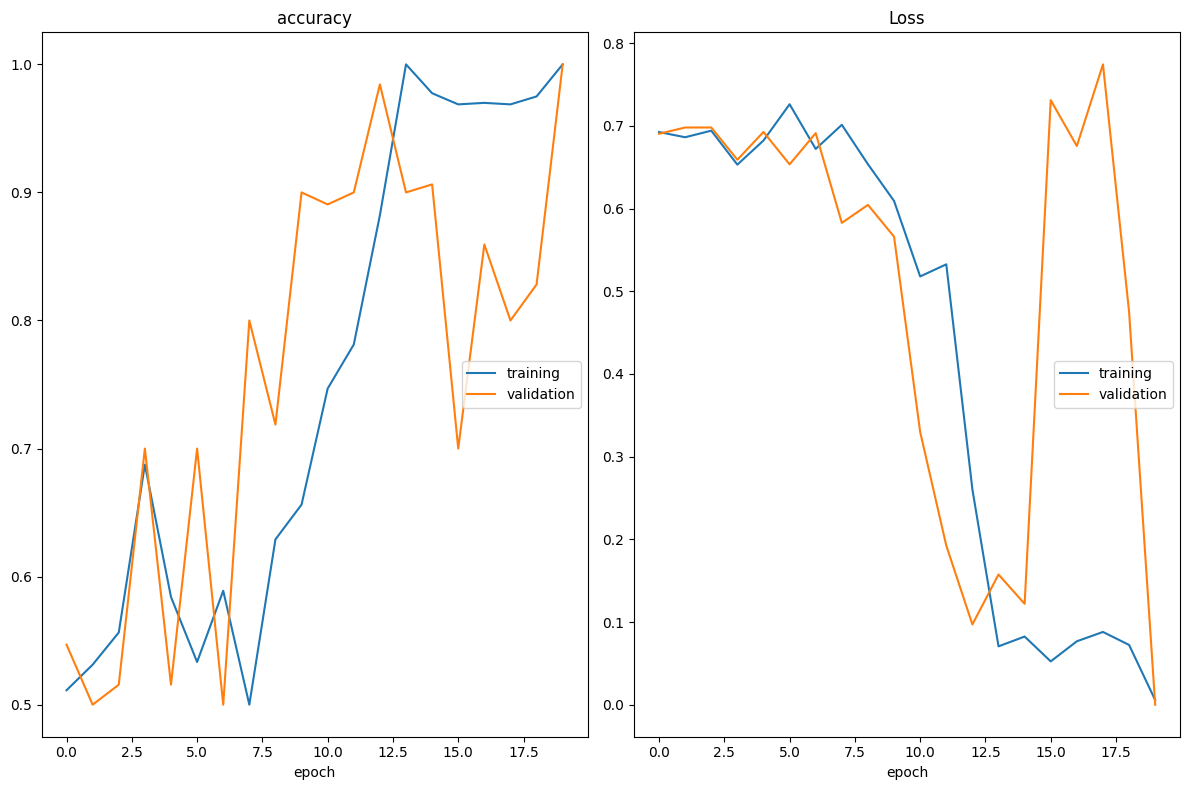

accuracy
	training         	 (min:    0.500, max:    1.000, cur:    1.000)
	validation       	 (min:    0.500, max:    1.000, cur:    1.000)
Loss
	training         	 (min:    0.006, max:    0.726, cur:    0.006)
	validation       	 (min:    0.000, max:    0.774, cur:    0.000)
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - accuracy: 1.0000 - loss: 0.0057 - val_accuracy: 1.0000 - val_loss: 1.1843e-04


In [ ]:
# Training
model.fit(
    training_generator,
    steps_per_epoch=len(training_generator.filenames) // BATCH_SIZE,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=len(validation_generator.filenames) // BATCH_SIZE,
    callbacks=[PlotLossesCallback(), CSVLogger(TRAINING_LOGS_FILE,
                                            append=False,
                                            separator=";")],
    verbose=1)


In [ ]:
model.save('my_model.keras')

In [ ]:
# Testing
probabilities = model.predict_generator(test_generator, TEST_SIZE)
for index, probability in enumerate(probabilities):
    image_path = test_final_dir + "/" +test_generator.filenames[index]
    img = mpimg.imread(image_path)
    plt.imshow(img)
    if probability > 0.5:
        plt.title("%.2f" % (probability[0]*100) + "% up")
    else:
        plt.title("%.2f" % ((1-probability[0])*100) + "% down")
    plt.show()

AttributeError: 'Sequential' object has no attribute 'predict_generator'